Bibliotecas para manipular áudio


In [1]:
import sounddevice as sd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

Biblioteca para manipular vídeo


In [2]:
from moviepy.editor import *
import moviepy.editor as mpe


Carregando o vídeo


In [3]:
video = VideoFileClip("videoprojeto.mp4",fps_source='fps')

In [4]:
#video.ipython_display(width=480, maxduration=180) para diminuir o tamanho do arquivo

Invertendo de 20 em 20 segundos

In [5]:
from moviepy.editor import VideoFileClip, concatenate_videoclips, vfx

def invert(frame):
    video_inicial = VideoFileClip(frame,fps_source='fps') 
    duracao = video_inicial.duration #duracao total do video
    segmento = 20 #tamanho dos blocos 

    clips = []

    for inicio in range(0, int(duracao), segmento):
        fim = min(inicio + segmento, duracao)
        trecho = video_inicial.subclip(inicio,fim)

        if(inicio // segmento) % 2 == 0:
            clips.append(trecho)
        else:
            trecho_invertido = trecho.fx(vfx.mirror_x)
            clips.append(trecho_invertido)
        
    # Junta todos os trechos (normais e invertidos) em um único vídeo
    video_final = concatenate_videoclips(clips)

    return video_final

#chama a função para inverter
video_invertido = invert("videoprojeto.mp4")
#mostra o video invertendo
#video_invertido.ipython_display(width=480, maxduration=180)



Diminuindo o áudio gradativamente


In [6]:
# 1. Carrega o vídeo original
video = video_invertido

# 2. Extrai o áudio original
original_audio = video.audio

duration = video.duration

# 3. Função de volume por tempo
def volume_by_time(t):
    t = np.array(t)  # garante que t é um array (mesmo que escalar)
    # aplica a regra de volume elemento a elemento
    vol = np.where(
        t > duration - 10,
        0,
        np.maximum(1 - 0.23 * np.floor(t / 30), 0)
    )
    return vol

# 4. Aplica a modulação de volume ao áudio
def apply_volume_modulation(audio_clip):
    return audio_clip.fl(lambda gf, t: gf(t) * volume_by_time(t)[:, np.newaxis])

# 5. Modifica o áudio
audio_modificado = apply_volume_modulation(original_audio)

# 6. Junta o áudio modificado ao vídeo original
video_com_audio_modificado = video.set_audio(audio_modificado)

# 7. Mostra o vídeo direto no notebook
#video_com_audio_modificado.ipython_display(width=480, maxduration=180)


Teste para verificar se o video está diminuindo


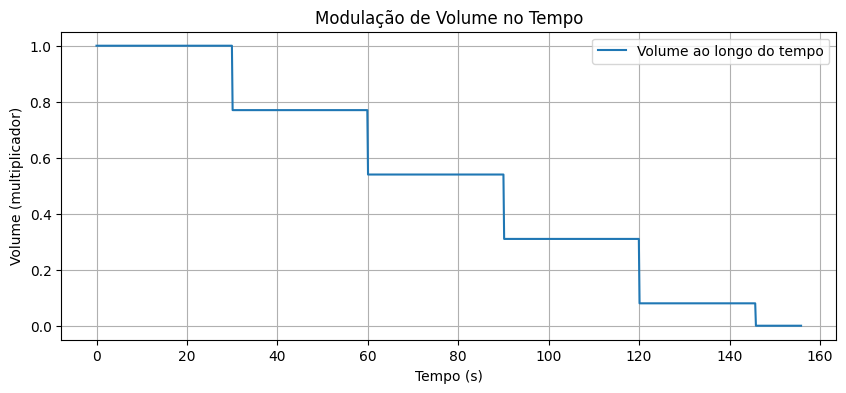

In [7]:
# duração do vídeo (já definido)
duration = video.duration

# gera tempos de 0 até duration, com passos pequenos
times = np.linspace(0, duration, 1000)

# calcula o volume para esses tempos
volumes = volume_by_time(times)

# plota o gráfico
plt.figure(figsize=(10, 4))
plt.plot(times, volumes, label="Volume ao longo do tempo")
plt.xlabel("Tempo (s)")
plt.ylabel("Volume (multiplicador)")
plt.title("Modulação de Volume no Tempo")
plt.grid(True)
plt.legend()
plt.show()

Fazendo recortes


In [8]:
part_1 = video_com_audio_modificado.subclip(0,60) #parte do video de 0 a 60 segundos
part_2 = video_com_audio_modificado.subclip(80)
part_3 = video_com_audio_modificado.subclip(60,80)

video_final = mpe.concatenate_videoclips([part_1, part_2, part_3])

#video_final.write_videofile('Video_final.mp4')
#video_final.ipython_display(width=480, maxduration=160)

https://youtu.be/Oio9KpRD4uA (video inicial)

https://youtu.be/-i5vdTMoMpo (video final)